# Random forest Error plot 

In [27]:
import pandas as pd
import numpy as np
df=pd.read_csv('G:\\Users\HP\Downloads\Crop_Recommend.csv')

In [28]:
from sklearn import metrics
from sklearn import preprocessing
cat_col=['label',]
le=preprocessing.LabelEncoder()
for i in cat_col:
    le.fit(list(df[i].unique()))
    df[i]=le.transform(df[i])
X=df.iloc[:,0:11].values
Y=df['label'].values
from sklearn.model_selection import train_test_split

In [29]:
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [30]:
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="auto",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

In [31]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175


In [32]:
import warnings
warnings.filterwarnings('ignore')
for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, Y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

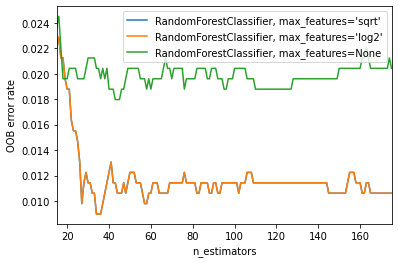

In [34]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()


# VARIANCE,ROC_SCORE,BIAS

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('G:\\Users\HP\Downloads\Crop_Recommend.csv')

In [2]:
from sklearn import metrics
from sklearn import preprocessing
cat_col=['label',]
le=preprocessing.LabelEncoder()
for i in cat_col:
    le.fit(list(df[i].unique()))
    df[i]=le.transform(df[i])
x=df.iloc[:,0:11].values
y=df['label'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [3]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d
clf=RandomForestClassifier(n_estimators=100,random_state=60)
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=60)

In [4]:
#Oob_score(Out_of_bag)
clf=RandomForestClassifier(n_estimators=100,random_state=60,oob_score=True)
clf.fit(x_train,y_train)
print('oob_score:Predicted score',clf.oob_score_)
print('oob_score:Training Data',clf.score(x_train,y_train))
print('oob_score:Testing Data',clf.score(x_test,y_test))

oob_score:Predicted score 0.9813084112149533
oob_score:Training Data 1.0
oob_score:Testing Data 0.9945652173913043


In [5]:
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d
clf=RandomForestClassifier(n_estimators=100,random_state=60,oob_score=True)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
#Errors
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
#20-fold cross validation
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
Rclf_accuracies=cross_val_score(clf,x_train,y_train,cv=20)
print('Mean_Rclf_Acc:',Rclf_accuracies.mean()) #prediction score

Mean Absolute Error: 0.04619565217391304
Root Mean Squared Error: 0.677671845685493
Mean_Rclf_Acc: 0.9790420819490585


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d
clf=RandomForestClassifier(random_state=123)
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=123)

In [7]:
from mlxtend.evaluate import bias_variance_decomp
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf, x_train, y_train, x_test, y_test, 
        loss='mse',
        num_rounds=50, # Number of bootstrap rounds for implementing the decomposition
        random_seed=123
)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 3.125
Average bias: 2.127
Average variance: 0.999


In [8]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, roc_curve, log_loss, brier_score_loss
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=309,n_estimators= 700,min_samples_leaf= 1, min_samples_split=2,max_features='auto' )
clf.fit(x_train,y_train)
print(clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 700, 'n_jobs': None, 'oob_score': False, 'random_state': 309, 'verbose': 0, 'warm_start': False}


In [9]:
clf_y_pred = clf.predict_proba(x_test)
clf_roc = roc_auc_score(y_test,clf_y_pred,multi_class='ovr')
print(clf_roc)

0.681025489145585
